In [1]:
"""
Noor Seijdel, 2017
"""

# import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import os.path 
import hddm
#import statsmodels.api as sm
from scipy.stats import pearsonr, percentileofscore, ttest_ind, ttest_rel, wilcoxon, ranksums
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
from patsy import center
%matplotlib inline 

# Set seaborn parameters 

cmap = sns.color_palette("hls", 8)
sns.set_palette(cmap)
sns.set_style("white")

# ======== #
# in HDDM 
# ======== #
# a - describes the distance between the decision boundaries
# t - describes all the non-decision time parameters (action, perception etc)
# z - bias that describes the starting point
# v - drift-rate
# dc, sv, st, sz - drift criterion, inter-trial variability

In [2]:
data = hddm.load_csv('/home/nseijde1/scenestats/hddm/scce_hddm/SCCE_def.csv') 

In [2]:
# test parallel
import ipyparallel as ipp
c = ipp.Client()
c.ids
c[:].apply_sync(lambda : "testing")

['testing', 'testing', 'testing', 'testing']

In [3]:
def run_model(id):
    import hddm
    import os.path
    #exp1, 2a, 2b
    data = hddm.load_csv('/home/nseijde1/scenestats/hddm/scce_hddm/SCCE_def.csv') 
    #data = hddm.load_csv('/media/noor/DataNS/Onderzoek/Projects/Scenestats/hddmregression/exp2a/SC_def.csv')
    #data = hddm.load_csv('/media/noor/DataNS/Onderzoek/Projects/Scenestats/hddmregression/exp2b/CE_def.csv')
    
    #model0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
    reg = [] #0
    #reg = ['v ~ CE_c'] #1
    #reg = ['v ~ SC_c'] #2
    #reg = ['a ~ CE_c'] #3
    #reg = ['a ~ SC_c'] #4
    #reg = ['v ~ CE_c', 'a ~ CE_c'] #5
    #reg = ['v ~ SC_c', 'a ~ SC_c'] #6
    #reg = ['v ~ CE_squared', 'a ~ CE_squared'] #7
    #reg = ['v ~ SC_squared', 'a ~ SC_squared'] #8
    #reg = ['v ~ CE_c + CE_squared', 'a ~ CE_c + CE_squared'] #9
    #reg = ['v ~ SC_c + SC_squared', 'a ~ SC_c + SC_squared'] #10
    os.chdir(u'/home/nseijde1')
    m = hddm.HDDMRegressor(data, reg, depends_on={'a':'SpAc'},bias=False, p_outlier=0.05)
    m.find_starting_values()
    m.sample(5000, burn=20, thin=2, dbname='traces%i.db'%id, db='pickle')
    return m



In [4]:
jobs = c[:].map(run_model, range(4)) # 4 is the number of CPUs
models0 = jobs.get()

In [5]:
import kabuki

In [6]:
combined_model0 = kabuki.utils.concat_models(models0)

                        mean          std         2.5q         25q        50q         75q       97.5q       mc err
a(Ac)                2.00752     0.103682      1.80966     1.93818    2.00626      2.0763     2.21504  0.000953875
a(Sp)                1.45756    0.0972109      1.27254     1.39172    1.45596     1.52239     1.65203    0.0010728
a_std               0.470513    0.0593598     0.371149    0.428146   0.465154    0.506592     0.60466  0.000670081
a_subj(Ac).ppn1      1.90174     0.051636      1.80131     1.86665    1.90119     1.93684     2.00453  0.000546336
a_subj(Ac).ppn10     1.74794    0.0486472      1.65367     1.71472    1.74727     1.78136     1.84305  0.000604643
a_subj(Ac).ppn11     1.94706    0.0538135      1.84112      1.9107    1.94693     1.98314      2.0533  0.000803571
a_subj(Ac).ppn12     1.53582    0.0375481      1.46402     1.51013    1.53551     1.56072     1.61142  0.000379732
a_subj(Ac).ppn13     3.02455    0.0883059      2.85383     2.96519    3.02433   

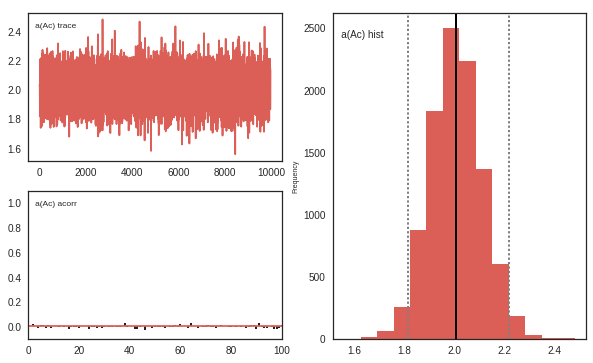

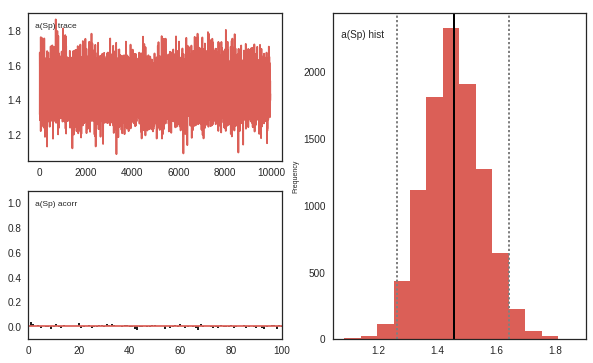

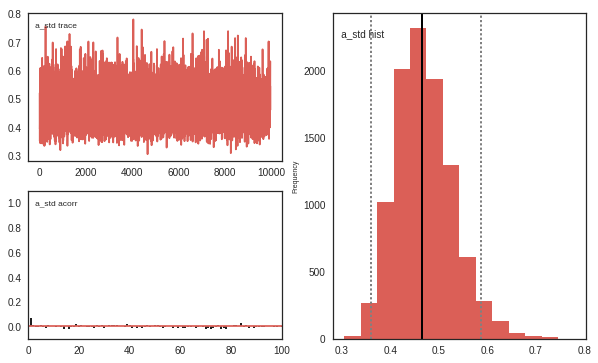

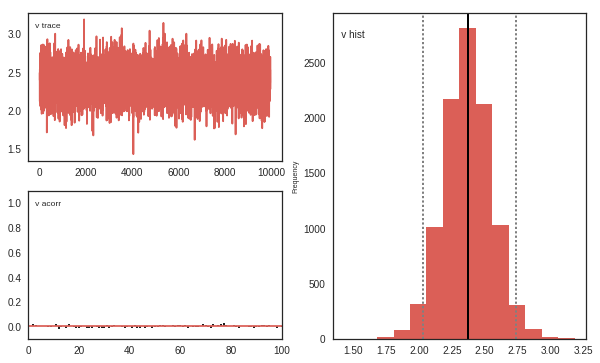

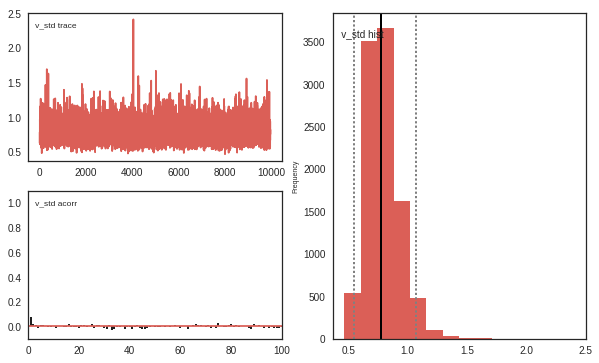

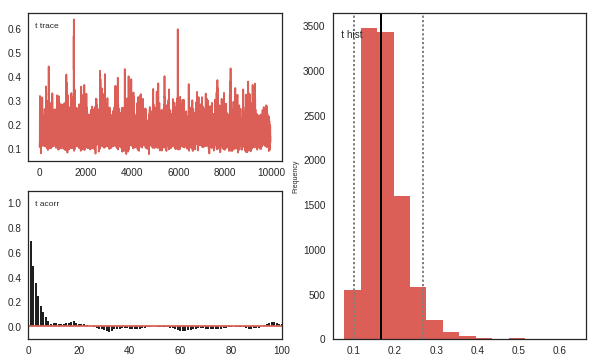

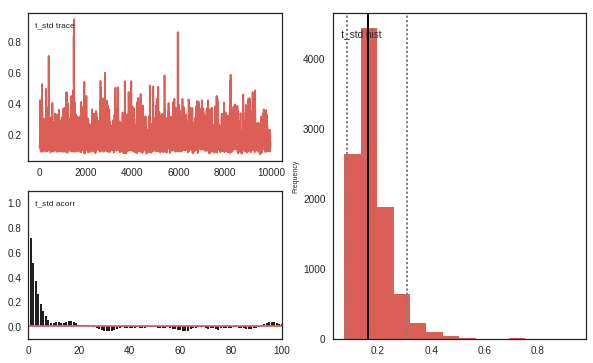

In [7]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp1/m0')  
combined_model0.save('m0')
combined_model0.print_stats()
combined_model0.plot_posteriors(save=True)

                                  mean          std         2.5q         25q         50q         75q       97.5q       mc err
v                              2.36397     0.179642      1.99761      2.2478     2.36635     2.48223     2.72218    0.0017601
v_std                          0.78873     0.140446     0.570804    0.689956     0.76941    0.865813     1.11337   0.00156562
v_subj.ppn1                    1.61185    0.0631057      1.48852     1.56847     1.61202     1.65498     1.73492  0.000667461
v_subj.ppn10                    3.1166    0.0973143      2.92693      3.0511     3.11607     3.18266     3.30904   0.00138665
v_subj.ppn11                   3.31201     0.102951      3.11246     3.24338     3.31197     3.38018     3.51531   0.00140371
v_subj.ppn12                   1.46565    0.0640855      1.33974     1.42279     1.46512     1.50892     1.59092  0.000631231
v_subj.ppn13                   2.19783     0.074701      2.05337     2.14702     2.19714     2.24808     2.34652  0.00

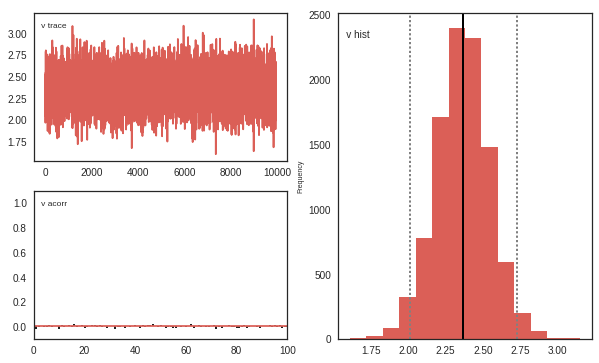

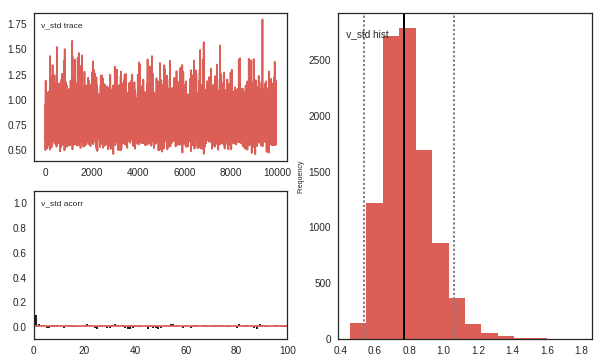

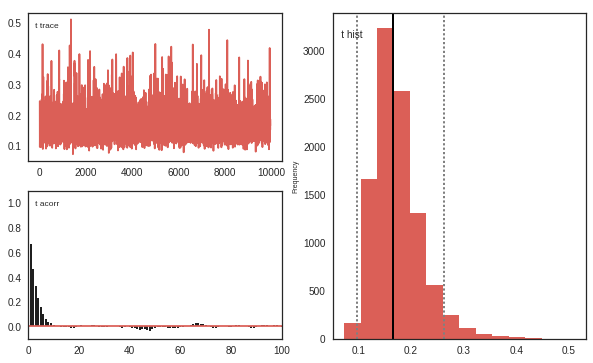

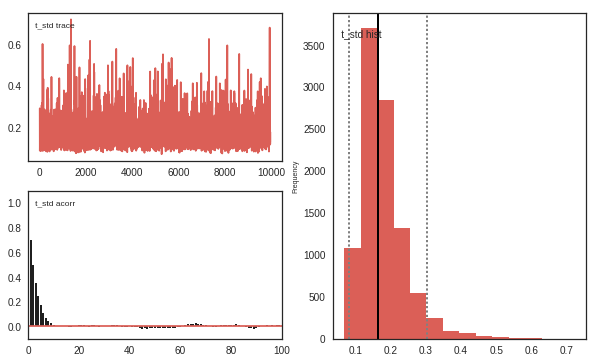

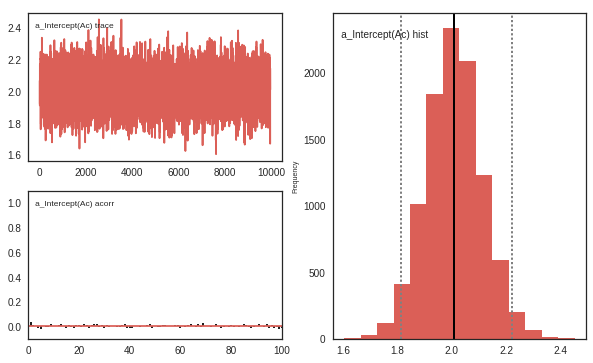

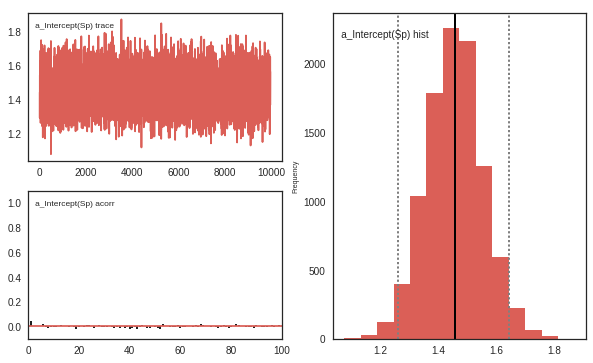

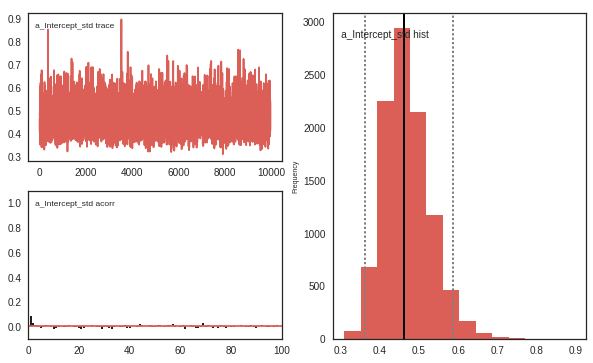

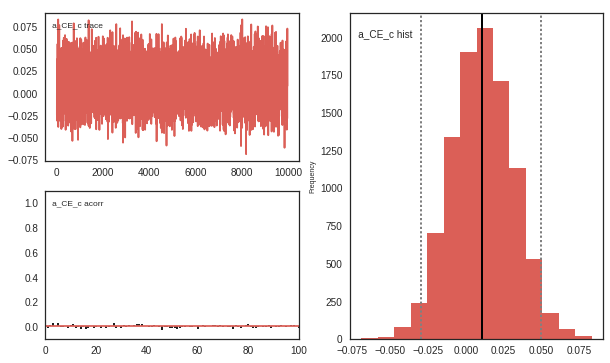

In [11]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m3')  
combined_model3.save('m3')
combined_model3.print_stats()
combined_model3.plot_posteriors(save=True)

                                  mean          std         2.5q          25q         50q         75q       97.5q       mc err
v                               2.3665      0.18043      2.00914      2.24964     2.36564     2.48283     2.72378   0.00186681
v_std                         0.789396     0.140668     0.570708     0.689248    0.771593    0.868558     1.11406    0.0013684
v_subj.ppn1                    1.61218    0.0632933      1.48746      1.56927     1.61215     1.65475     1.73453  0.000687716
v_subj.ppn10                   3.11483    0.0977171      2.92328      3.04852     3.11513     3.18162     3.30612   0.00134495
v_subj.ppn11                   3.30958     0.102333      3.10735      3.24065      3.3093     3.37901     3.50807   0.00132567
v_subj.ppn12                   1.46716    0.0641638       1.3425      1.42418     1.46648     1.51016     1.59386  0.000655078
v_subj.ppn13                   2.19887    0.0751527      2.05077      2.14839     2.19881     2.24939     2.345

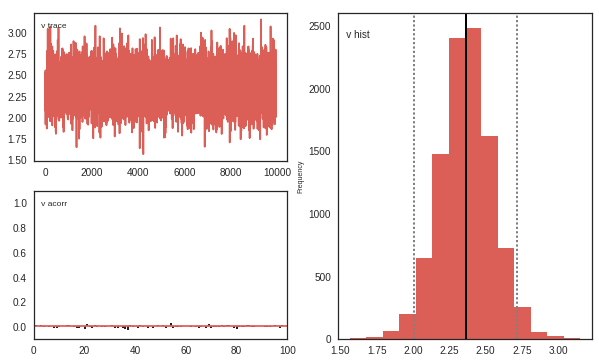

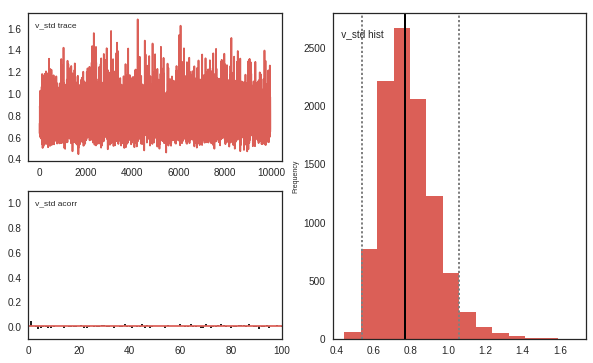

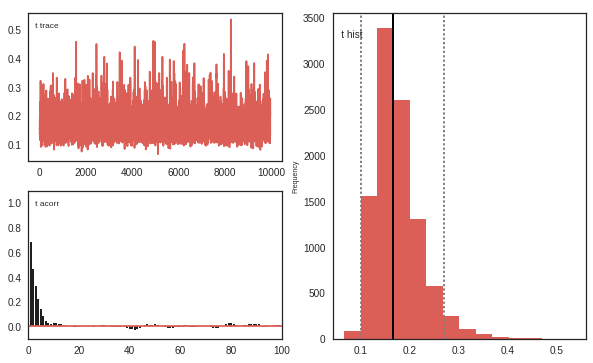

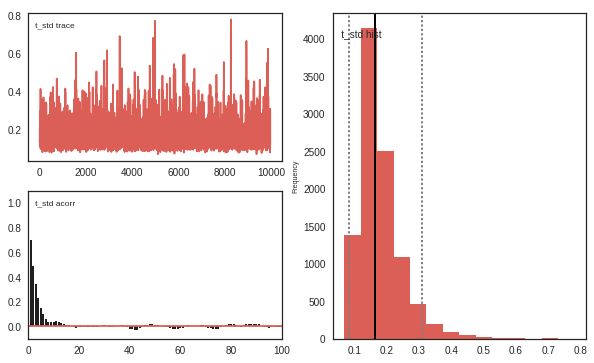

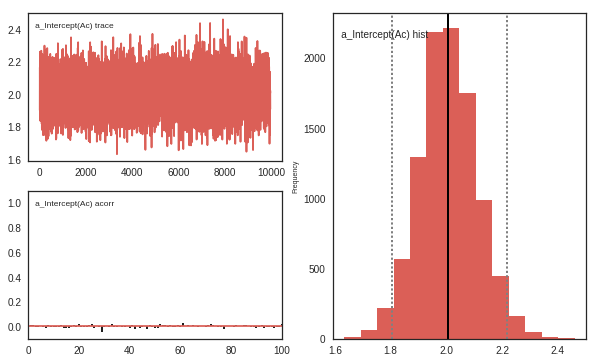

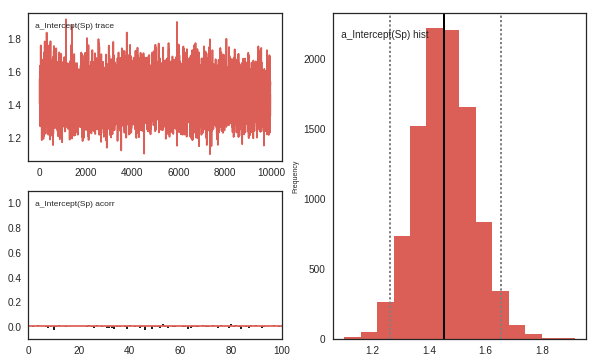

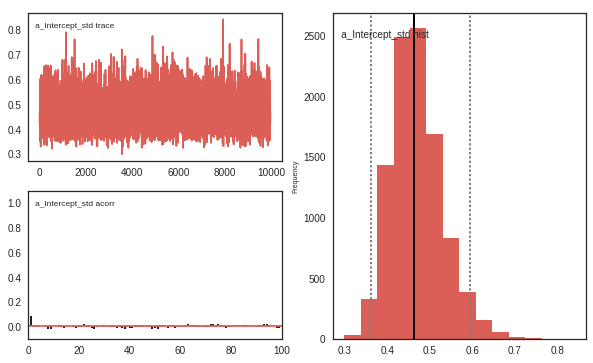

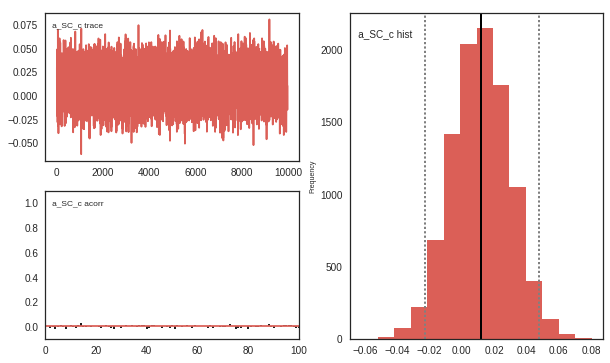

In [11]:
os.chdir(u'/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m4')  
combined_model4.save('m4')
combined_model4.print_stats()
combined_model4.plot_posteriors(save=True)

                                  mean          std         2.5q         25q         50q         75q      97.5q       mc err
t                             0.173581    0.0458186     0.107799      0.1416     0.16531    0.195878   0.288107   0.00104385
t_std                         0.177917    0.0649331    0.0962269    0.132985    0.163141    0.204718   0.348302   0.00148678
t_subj.ppn1                   0.139582   0.00163206     0.136046    0.138583    0.139712    0.140735   0.142405   1.5611e-05
t_subj.ppn10                  0.235963   0.00126458     0.233233    0.235167    0.236046    0.236856   0.238225  1.55024e-05
t_subj.ppn11                  0.207637   0.00119417     0.205097    0.206873     0.20772    0.208488   0.209747    1.326e-05
t_subj.ppn12                  0.194529     0.001354     0.191631    0.193684     0.19462    0.195485   0.196915   1.3201e-05
t_subj.ppn13                  0.203523   0.00121221      0.20088    0.202773    0.203624    0.204379   0.205627  1.17485e-05


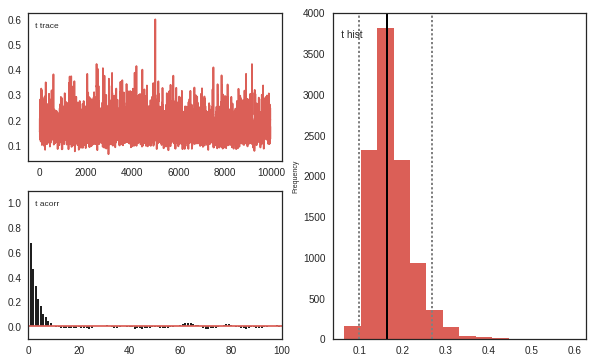

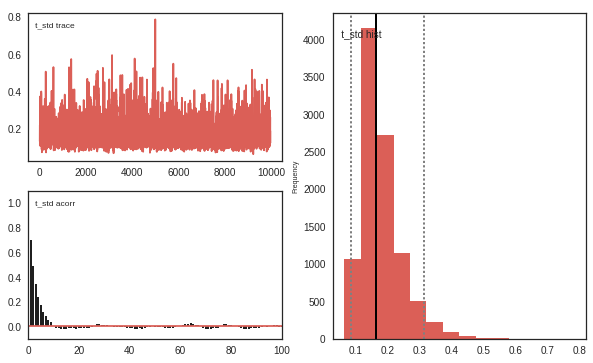

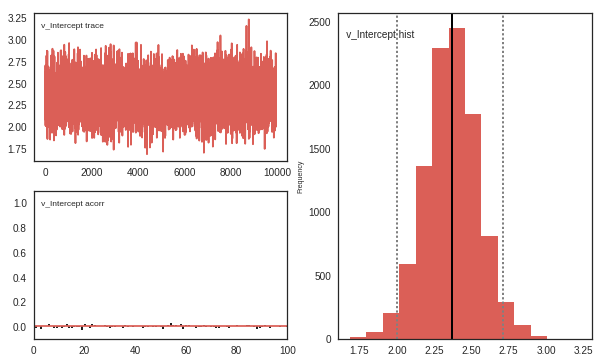

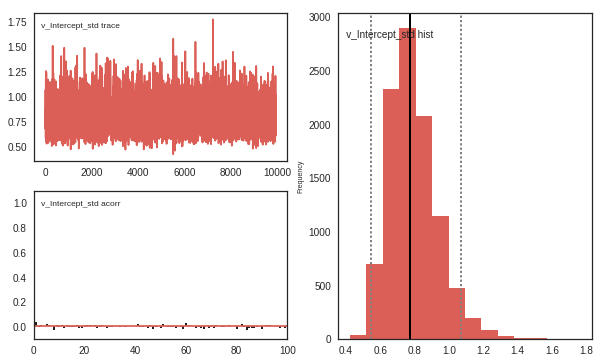

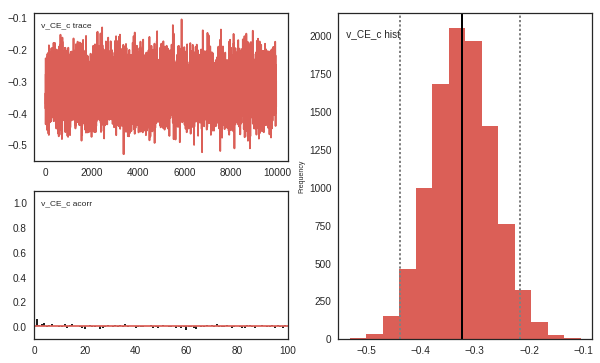

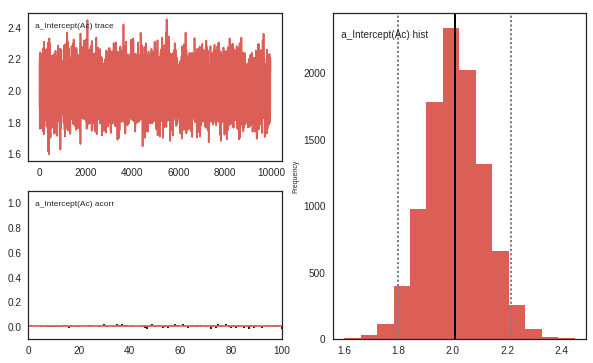

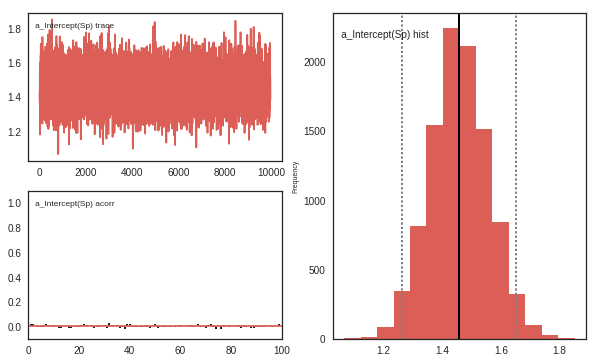

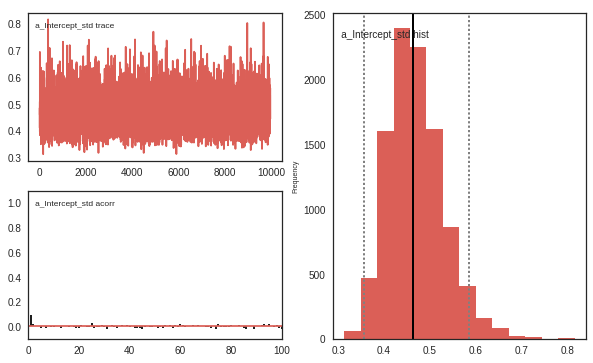

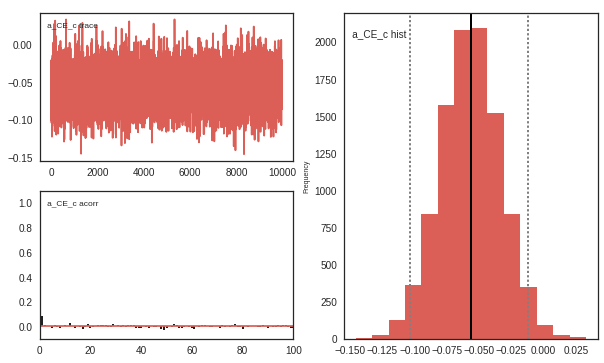

In [10]:
os.chdir('/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m5')  
combined_model5.save('m5')
combined_model5.print_stats()
combined_model5.plot_posteriors(save=True)

                                 mean          std         2.5q         25q         50q         75q       97.5q       mc err
t                            0.172853    0.0455358     0.108709    0.141763    0.164951    0.194844    0.285176   0.00109122
t_std                        0.176109    0.0638523    0.0973884    0.133319    0.161765    0.203157    0.339852   0.00151038
t_subj.ppn1                  0.139556   0.00160506     0.136133    0.138537    0.139656    0.140685    0.142405  1.80053e-05
t_subj.ppn10                    0.236   0.00126474     0.233222    0.235207    0.236092    0.236895    0.238222  1.42473e-05
t_subj.ppn11                 0.207637   0.00121806     0.204974    0.206863    0.207738    0.208501    0.209747   1.2084e-05
t_subj.ppn12                 0.194536   0.00135001     0.191636    0.193692    0.194644    0.195485    0.196868  1.34315e-05
t_subj.ppn13                 0.203465   0.00120503     0.200852    0.202709     0.20356     0.20432    0.205592   1.1364e-05


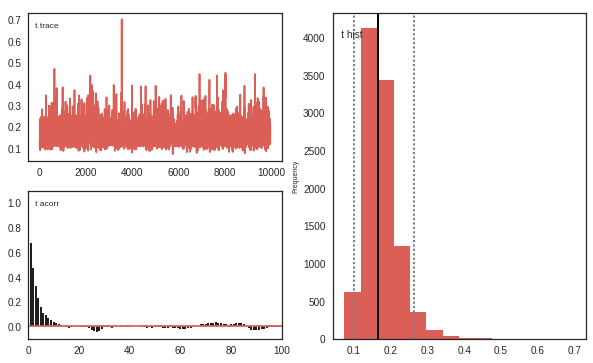

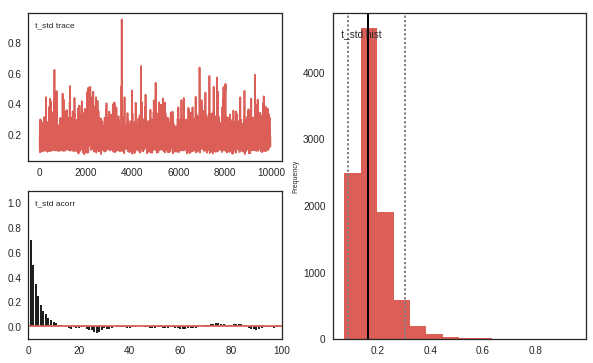

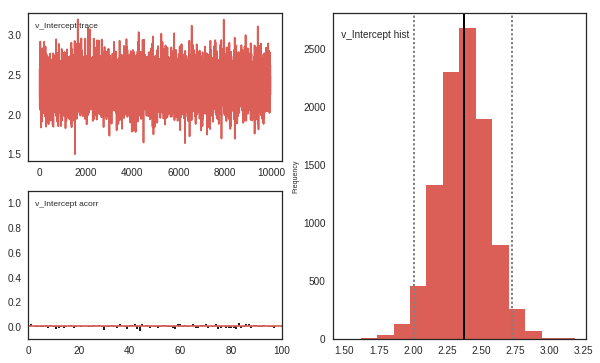

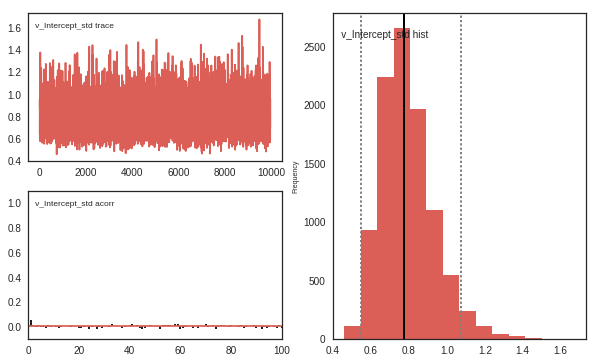

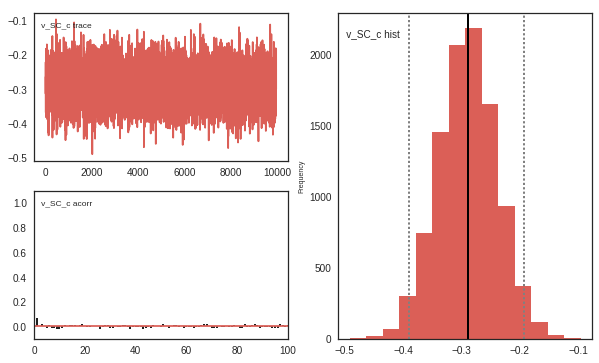

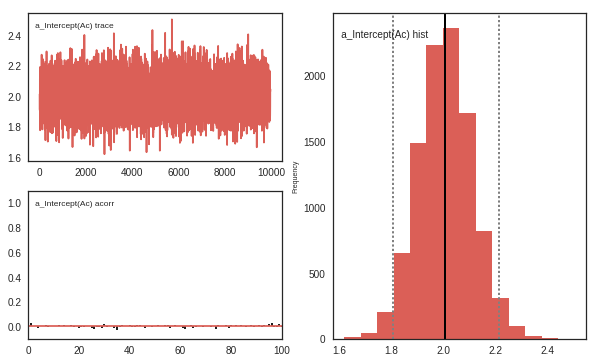

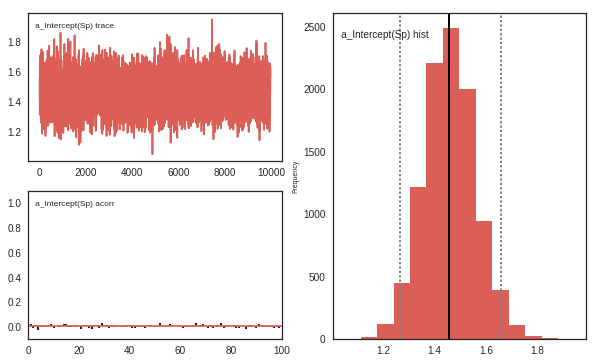

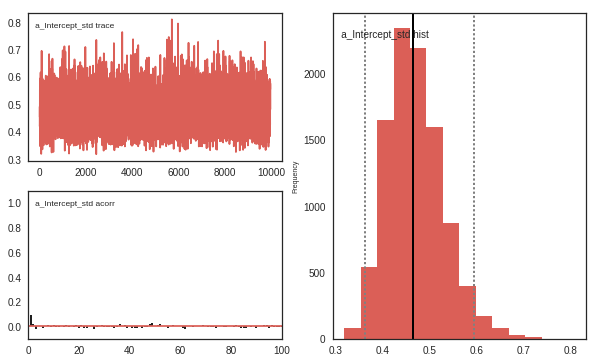

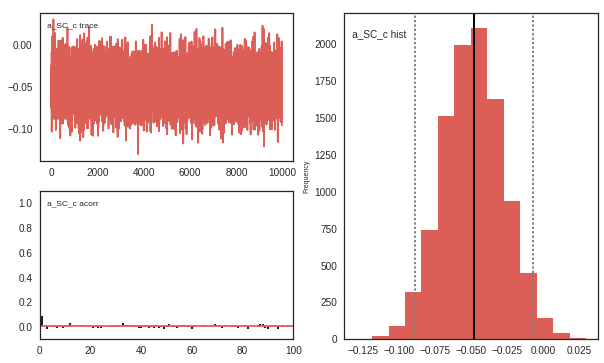

In [9]:
os.chdir('/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m6')  
combined_model6.save('m6')
combined_model6.print_stats()
combined_model6.plot_posteriors(save=True)

                                 mean          std         2.5q         25q         50q         75q       97.5q       mc err
t                            0.171821    0.0444251     0.107658    0.141105    0.164554    0.193891    0.281136  0.000943656
t_std                        0.174926    0.0627511    0.0962767    0.132554    0.161179     0.20109    0.332915   0.00136315
t_subj.ppn1                  0.139605   0.00160597     0.136169    0.138619    0.139697    0.140748    0.142425  1.52228e-05
t_subj.ppn10                 0.236091   0.00126523     0.233389    0.235306    0.236185    0.236972    0.238306  1.34425e-05
t_subj.ppn11                 0.207723   0.00120679     0.205093    0.206967    0.207787    0.208588    0.209854  1.25441e-05
t_subj.ppn12                 0.194488    0.0013526     0.191521    0.193639    0.194606    0.195437     0.19684   1.2778e-05
t_subj.ppn13                 0.203386   0.00120376     0.200791    0.202607    0.203465    0.204237    0.205495  1.28836e-05


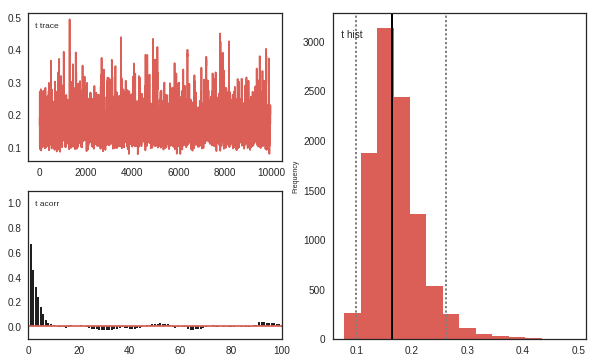

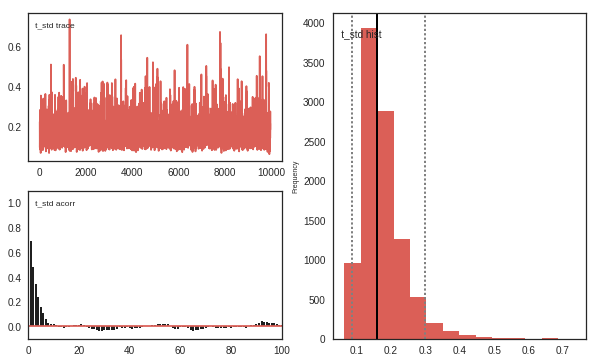

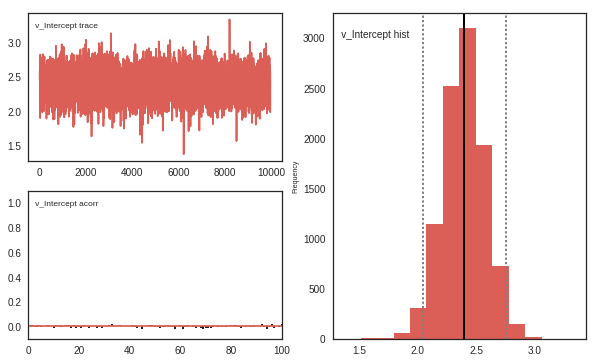

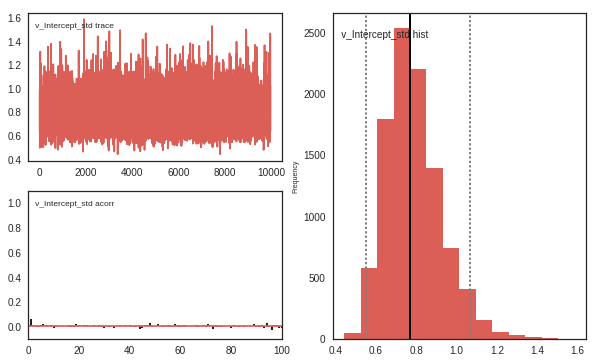

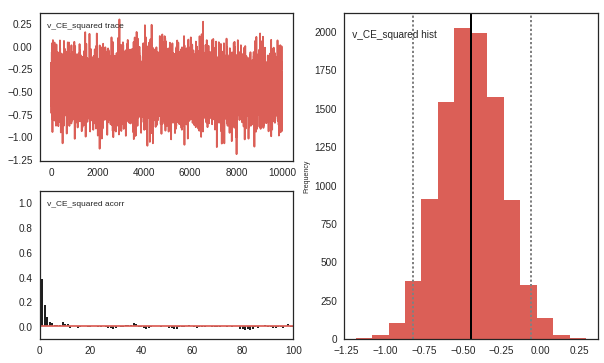

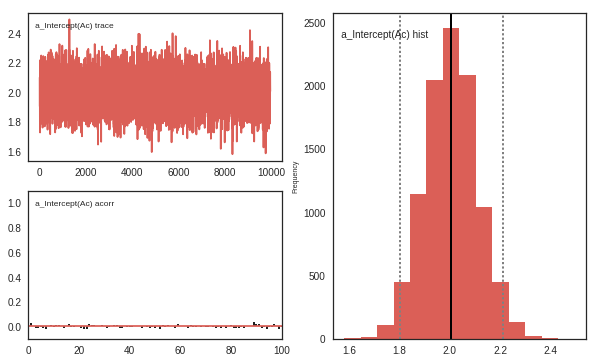

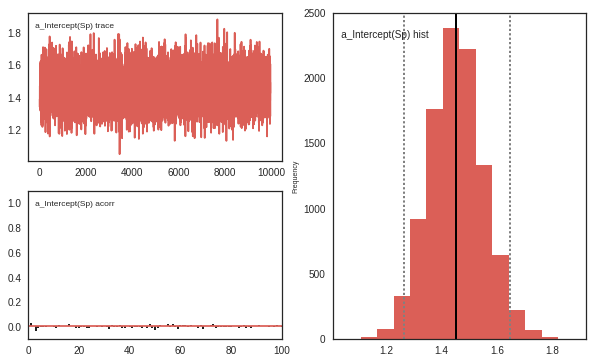

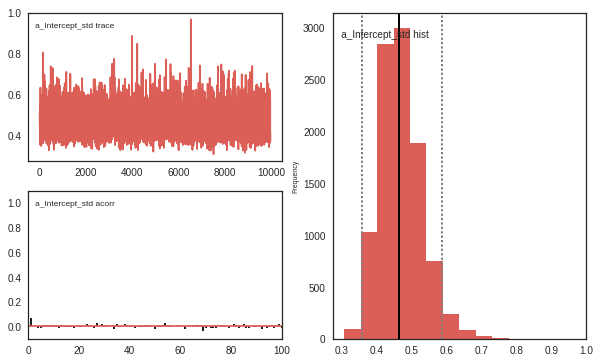

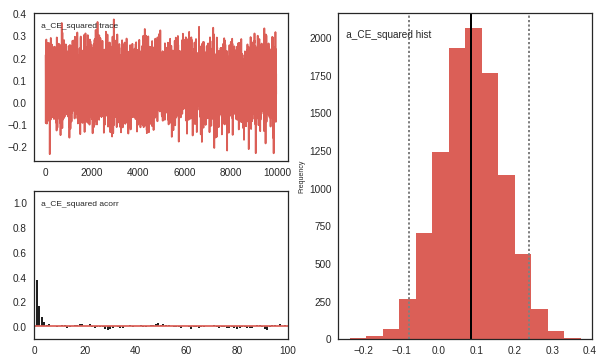

In [8]:
os.chdir('/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m7')  
combined_model7.save('m7')
combined_model7.print_stats()
combined_model7.plot_posteriors(save=True)

                                  mean         std         2.5q         25q         50q         75q       97.5q       mc err
t                             0.172854   0.0449064     0.108263    0.141709    0.164546    0.194634     0.28297  0.000958027
t_std                         0.176115    0.063108    0.0974705    0.132594    0.161664    0.202523    0.337243   0.00139941
t_subj.ppn1                   0.139533  0.00162554     0.136072     0.13848    0.139665    0.140692    0.142379  1.69537e-05
t_subj.ppn10                  0.236024  0.00127499     0.233236    0.235232    0.236113    0.236923    0.238266  1.44277e-05
t_subj.ppn11                   0.20765  0.00120523     0.205041    0.206896    0.207736    0.208504    0.209801  1.27108e-05
t_subj.ppn12                  0.194459  0.00135925     0.191536    0.193607    0.194561    0.195425    0.196814  1.51926e-05
t_subj.ppn13                  0.203381  0.00121477     0.200755    0.202612    0.203476    0.204231    0.205477  1.21628e-05


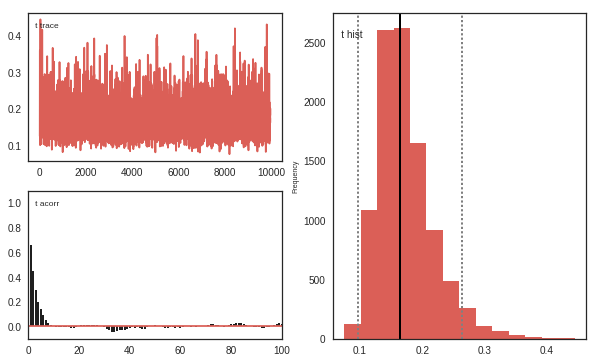

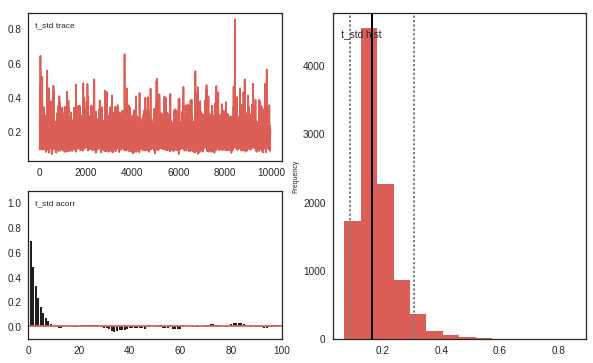

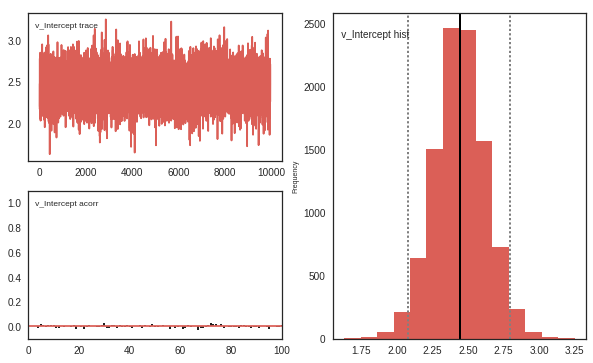

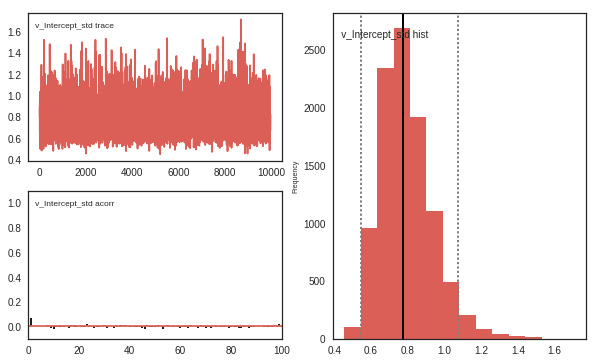

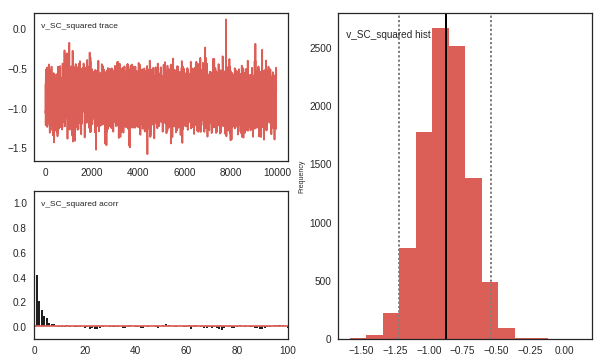

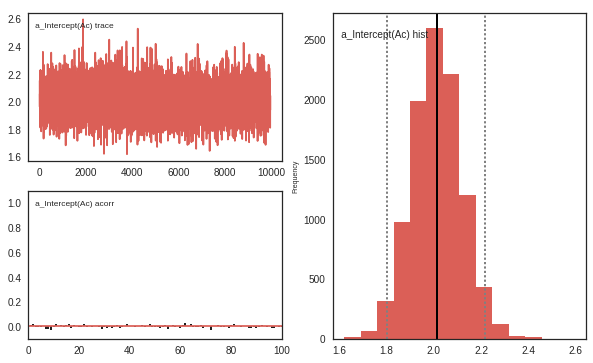

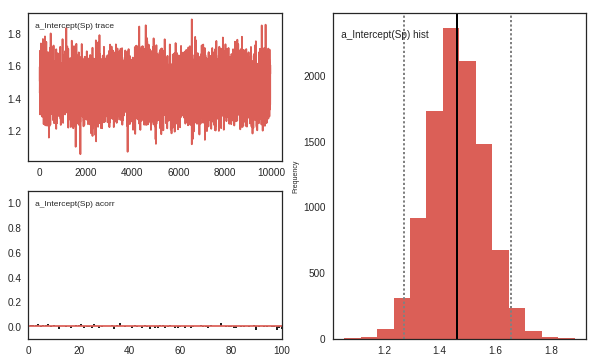

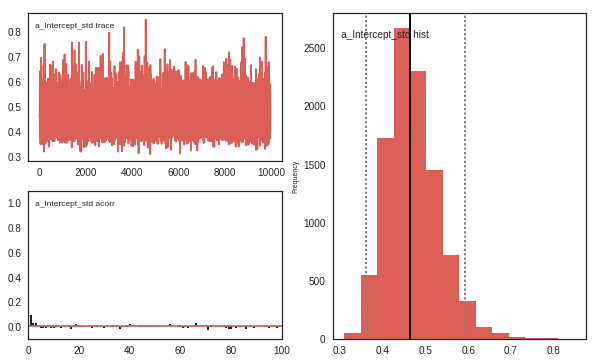

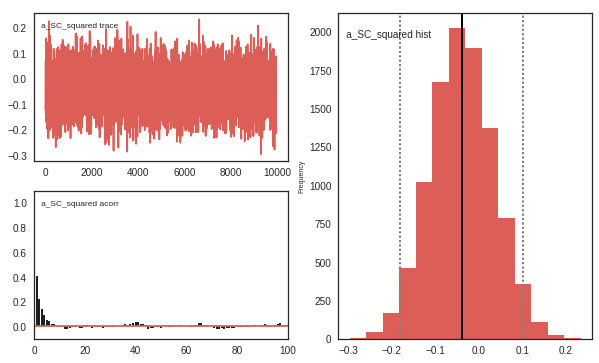

In [8]:
os.chdir('/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m8')  
combined_model8.save('m8')
combined_model8.print_stats()
combined_model8.plot_posteriors(save=True)

                                 mean          std         2.5q         25q         50q         75q       97.5q       mc err
t                            0.170401    0.0430215     0.107944    0.141231     0.16297    0.192002    0.275238  0.000837607
t_std                        0.172668     0.059885    0.0953554    0.131564    0.159809       0.199    0.326224   0.00117667
t_subj.ppn1                  0.139663   0.00160588     0.136202    0.138649    0.139771    0.140794    0.142447  1.52356e-05
t_subj.ppn10                 0.236027   0.00125298     0.233328    0.235245    0.236104    0.236917    0.238215  1.40014e-05
t_subj.ppn11                 0.207698   0.00118938     0.205191    0.206931    0.207769    0.208562    0.209804  1.21697e-05
t_subj.ppn12                 0.194594   0.00133577     0.191689    0.193784    0.194679     0.19553    0.196945  1.49957e-05
t_subj.ppn13                  0.20352   0.00120173     0.200925    0.202761     0.20362    0.204366     0.20562  1.36711e-05


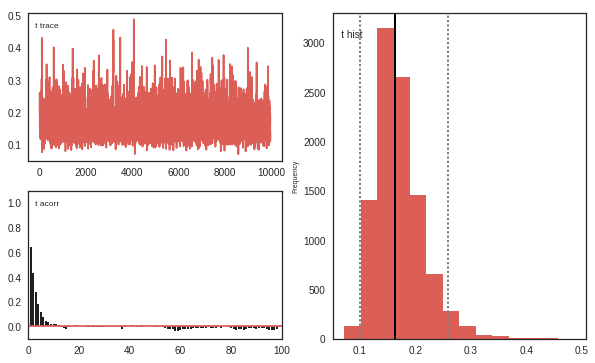

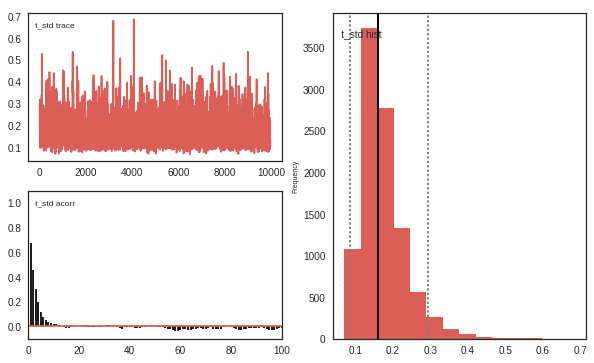

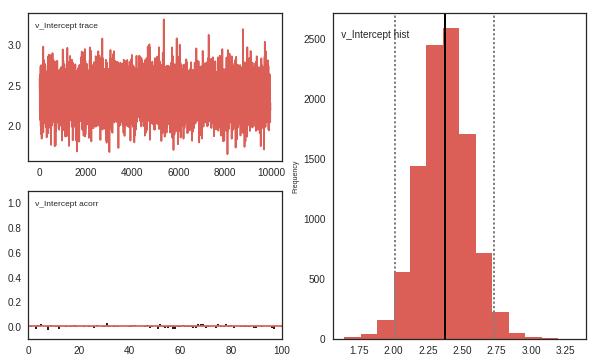

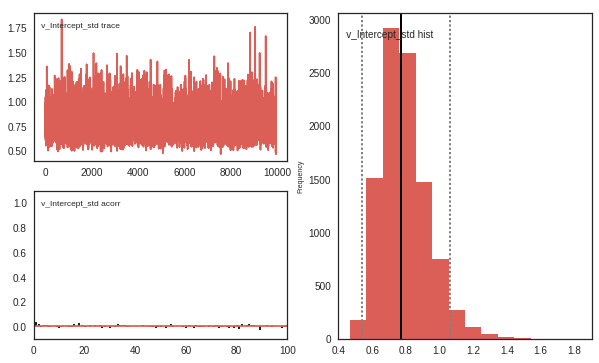

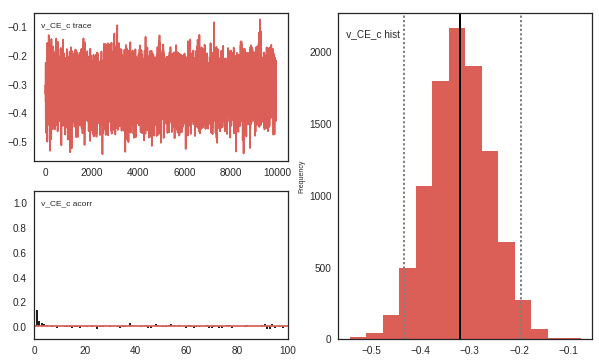

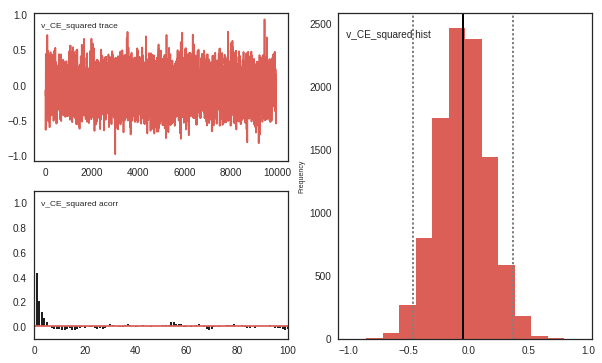

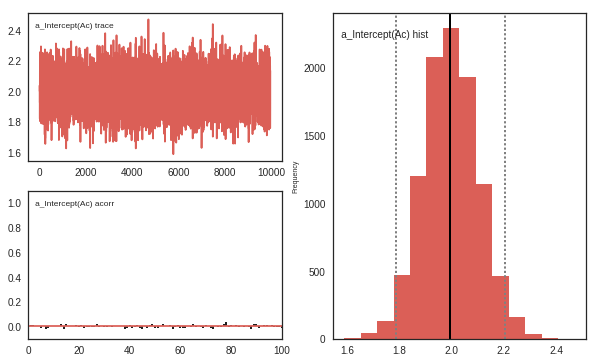

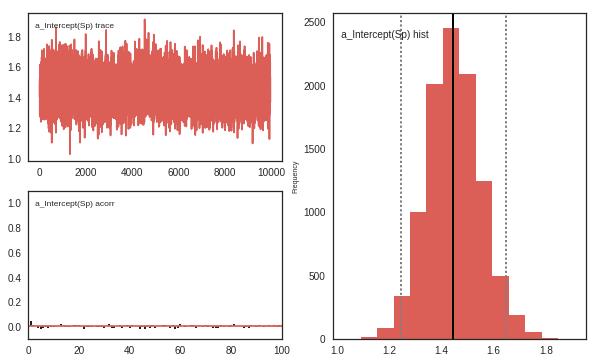

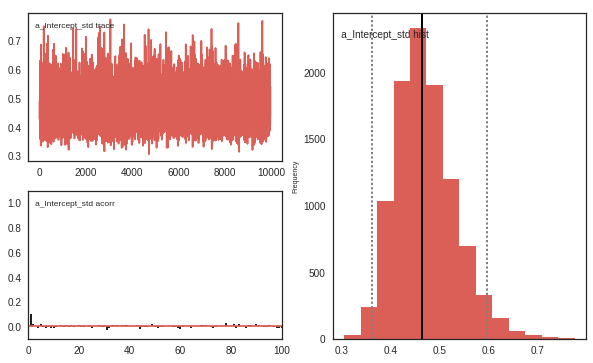

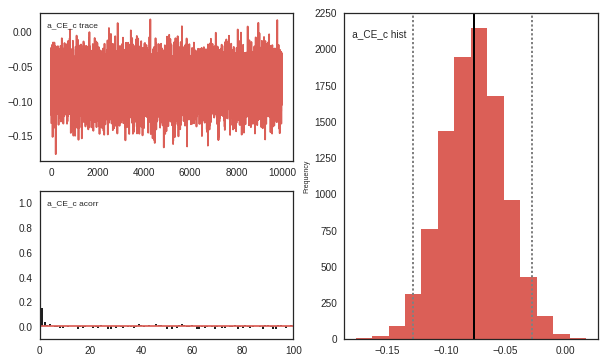

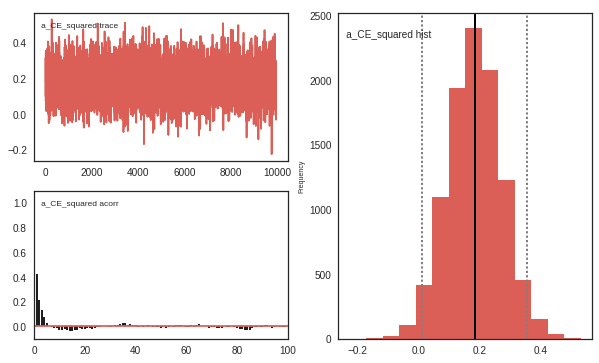

In [9]:
os.chdir('/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m9')  
combined_model9.save('m9')
combined_model9.print_stats()
combined_model9.plot_posteriors(save=True)

                                   mean          std         2.5q         25q         50q         75q       97.5q       mc err
t                              0.171205    0.0446525     0.107851    0.140168    0.163756    0.193187    0.281391   0.00104584
t_std                          0.174061    0.0637945    0.0958939    0.131329    0.159813      0.2005    0.335148   0.00156058
t_subj.ppn1                    0.139556   0.00162538     0.136091    0.138529    0.139697    0.140714    0.142359  1.63887e-05
t_subj.ppn10                   0.235999   0.00128145     0.233178    0.235191    0.236103    0.236896    0.238238  1.46438e-05
t_subj.ppn11                   0.207689    0.0012151     0.205073    0.206922    0.207783    0.208554    0.209802  1.42781e-05
t_subj.ppn12                   0.194547   0.00133593     0.191649     0.19372    0.194659    0.195501    0.196852  1.27083e-05
t_subj.ppn13                   0.203425   0.00121917     0.200793    0.202646    0.203514    0.204291    0.2055

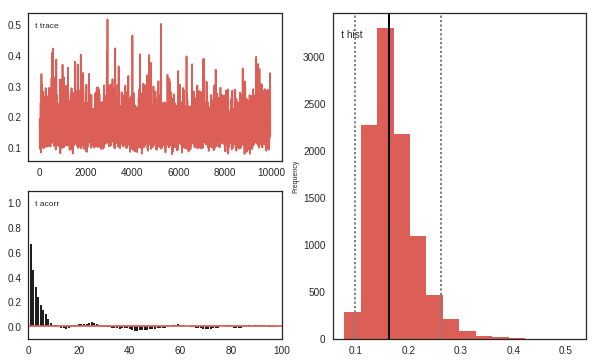

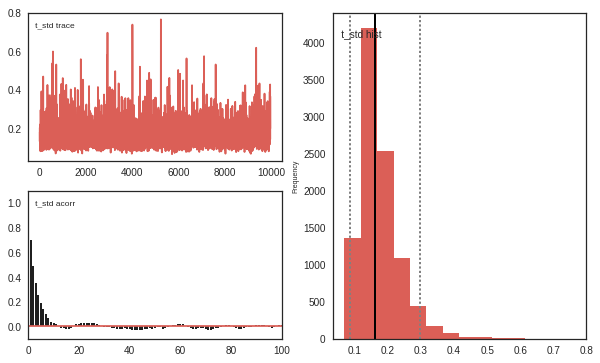

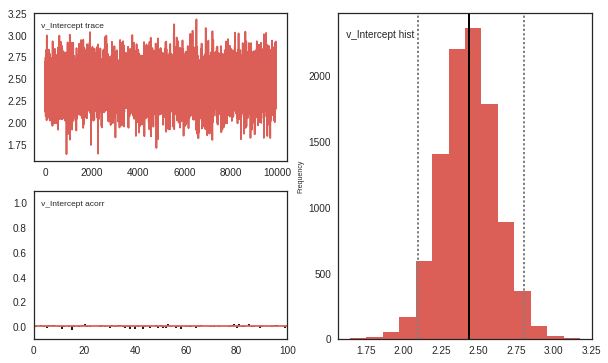

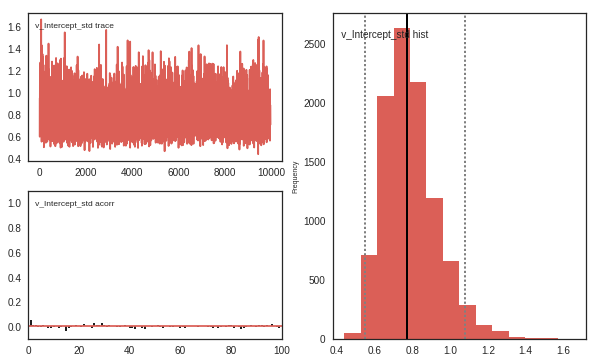

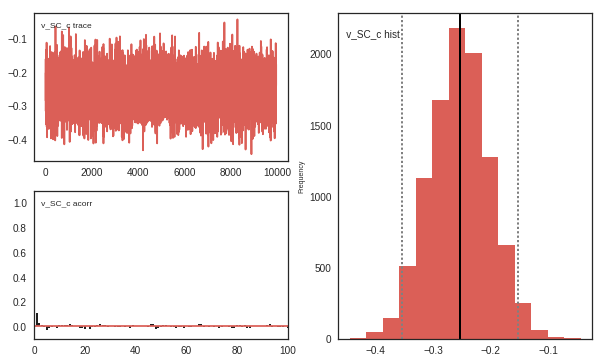

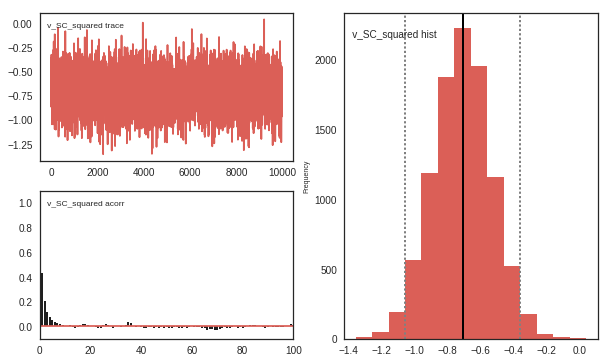

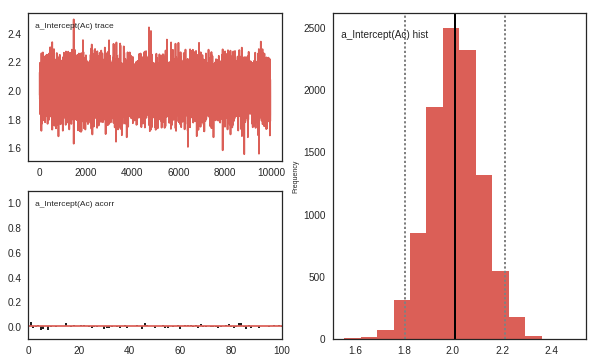

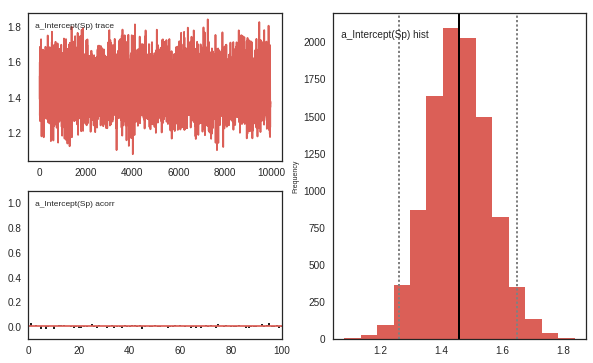

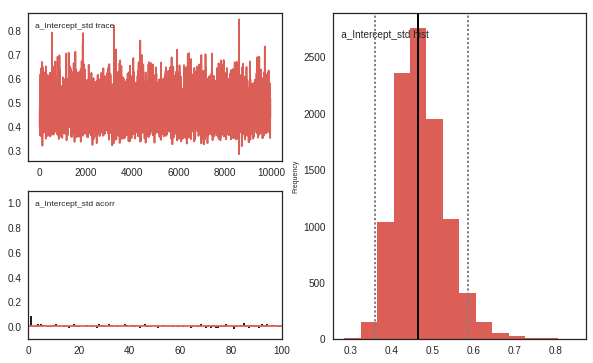

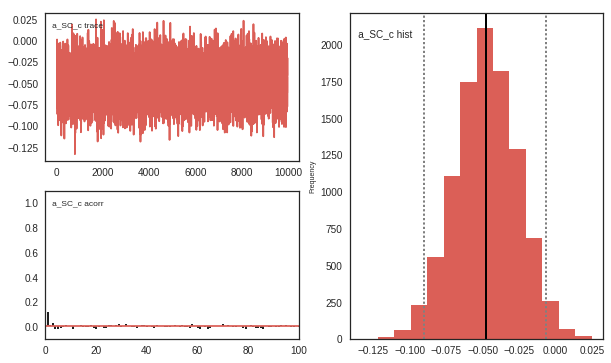

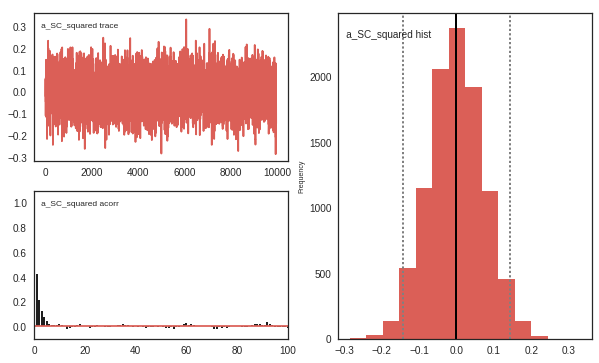

In [8]:
os.chdir('/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen/m10')  
combined_model10.save('m10')
combined_model10.print_stats()
combined_model10.plot_posteriors(save=True)

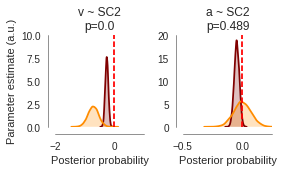

In [9]:
fig_dir = u'/home/nseijde1/scenestats/hddmregression/exp1/nulmodellen'
params_of_interest = ['v_SC_c', 'v_SC_squared', 'a_SC_c', 'a_SC_squared']
titles = ['v ~ SC', 'v ~ SC2','a ~ SC', 'a ~ SC2' ]

traces = []
for p in range(len(params_of_interest)):
    traces.append(combined_model10.nodes_db.node[params_of_interest[p]].trace.gettrace())

stats = []
for p in range(len(params_of_interest)):
    stat = min(np.mean(traces[p] > 0), np.mean(traces[p] < 0))
    stats.append(min(stat, 1-stat))
#stats = np.array(stats)    

fig, axes = plt.subplots(nrows=1, ncols=len(params_of_interest)/2, figsize=(len(params_of_interest),2.5))


ax_nr = 0
pl = 0
cc=['maroon','darkorange','maroon', 'darkorange']
for p in range(len(params_of_interest)):
    data = [traces[p]]
    ax = axes[ax_nr]
    for d, label, c in zip(data, ['1',], ['black']):
        sns.kdeplot(d, vertical=False, shade=True, color=cc[pl], ax=ax)
        ax.set_xlabel('Posterior probability')
        ax.set_title('{}\np={}'.format(titles[pl], round(stats[p],3)))
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
            ax.tick_params(width=0.5)          
        pl+=1
        if pl == 2:
            ax_nr+=1
        
sns.despine(offset=7, trim=False)
axes[0].set_ylabel('Parameter estimate (a.u.)')
axes[0].axvline(x=0, color='r', linestyle='--')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[0].set_ylim(0,10)
axes[0].set_xlim(-2,1)
axes[1].set_ylim(0,20)
axes[1].set_xlim(-0.5,0.25)

plt.tight_layout()
fig.savefig(os.path.join(fig_dir, 'posteriors.pdf'))